# ___GRIP - DATA SCIENCE AND BUSINESS ANALYTICS___

## ___Author Name = Naveen Kumar___

### ___Date = December,  27 2022___

# ___Task-6: Prediction Using Decision Tree, Logistic Regression, and KNN Algorithm.___

In [1]:
# Import Liabraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Dataset
data = pd.read_csv(r'C:\Users\navee\Downloads\Iris.csv')

# Preview of Data
- There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
- There are no null values, so we don't have to worry about that.
- There are 50 observations of each species (setosa, versicolor, virginica).

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Information about Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Statistical Summary of numerical columns
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Data Visualization
- After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
- There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).


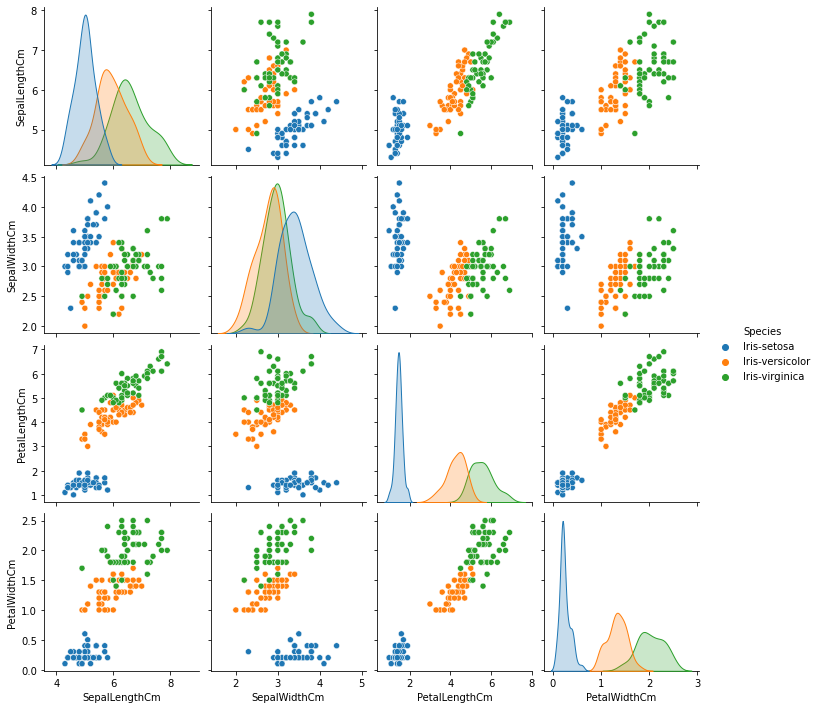

In [7]:
tmp = data.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species')
plt.show()

<AxesSubplot:>

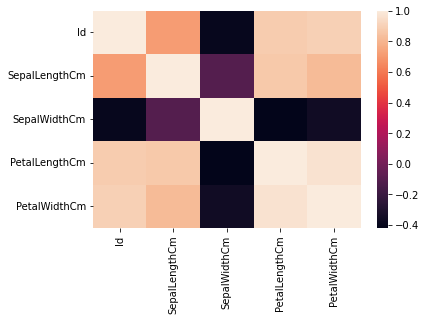

In [8]:
# Heatmap shows the correlation of attributes
sns.heatmap(data.corr())

# Modeling with scikit-learn

In [9]:
# Hold-out Splitting Technique
from sklearn.model_selection import train_test_split

In [10]:
X = data.drop(['Id', 'Species'], axis=1)
y = data['Species']

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [11]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


# Decision Tree Alogrithm

In [14]:
# Import Decision Tree Algorithm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [15]:
# Decision Tred (For Classification)
DT = DecisionTreeClassifier()
modelDT = DT.fit(X_train,y_train)
predDT = modelDT.predict(X_test)

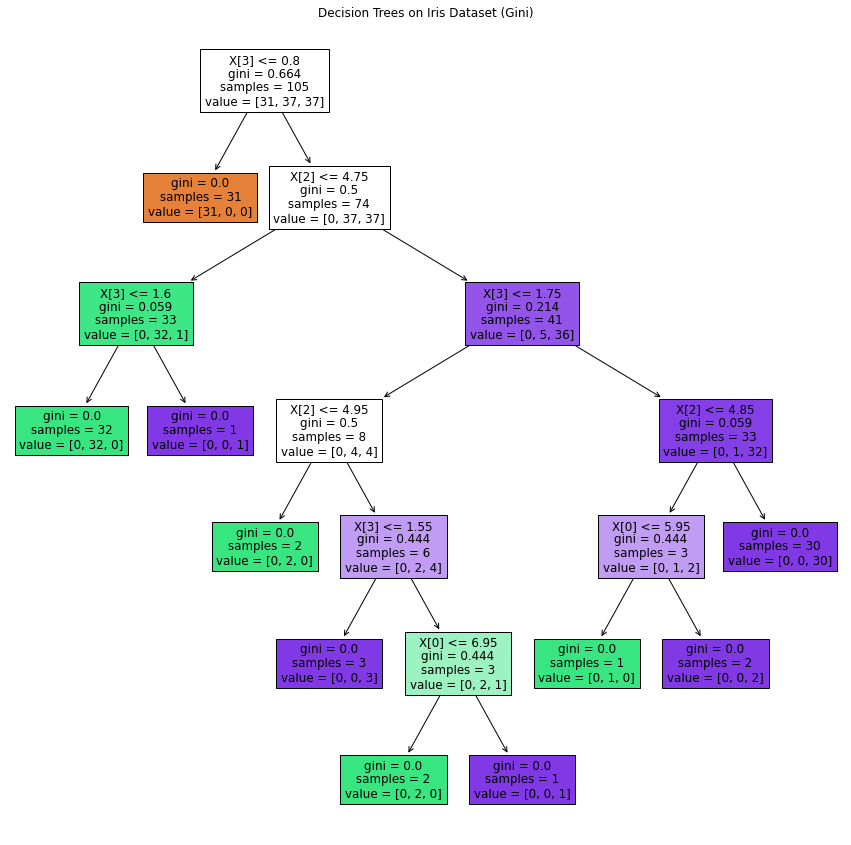

In [16]:
# Plot the Tree of Decision Tree Model
plt.figure(figsize=(15,15))
tree.plot_tree(modelDT, filled=True)
plt.title("Decision Trees on Iris Dataset (Gini)")
plt.show()

In [17]:
# Measuring the Performance of model
print(classification_report(y_test,predDT))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [18]:
#Checking the model
print(modelDT.predict([[2.5,3,5.2,3.3]]))


['Iris-virginica']


## Logistic Regression Algorithm

In [19]:
# Import Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [20]:
#Logistic Regression (For Classification)
LR = LogisticRegression()
modelLR = LR.fit(X_train,y_train)
predLR = modelLR.predict(X_test)

In [21]:
# Measuring the Performance of model
print(classification_report(y_test,predLR))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [22]:
# Checking the Model
print(modelLR.predict([[2.5,3,5.2,3.3]]))

['Iris-virginica']


## K-Nearest Neighbor Algorithm 

In [23]:
# Import KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [24]:
#KNN Neighbors Classifier (For Classification)
KNN = KNeighborsClassifier(n_neighbors=5)
modelKNN = KNN.fit(X_train, y_train)
predKNN = modelKNN.predict(X_test)

In [25]:
# # Measuring the Performance of model
print(classification_report(y_test,predKNN))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [26]:
#Checking the model
print(modelKNN.predict([[2.5,3,5.2,3.3]]))


['Iris-virginica']
